# Evaluierung des optimalen Aktienportfolios 

##### 1. Problemstellung
##### 2. Datenaufbereitung
- Berechnung von Risikokennzahlen (Diskrete Rendite, Stetige Rendite, Value-at-Risk
##### 3. Explorative Datenanalyse
##### 4. Datenanalyse
- Monte-Carlo Ansatz zur Berechnung des optimalen Portfolios
##### 5. Modellevaluation
- Auswahl der maximalsten "Sharpeness"
##### 6. Interpretation

### 1. Problemstellung

Anleger versuchen in die besten Assets für ihre Renditensteigerung mit dem minimalsten Risiko zu investieren. Aus diesem Grund interessiert sich der Auftraggeber dafür, welche Aktienportfolio am Geeignetsten für eine Investition ist. Aus diesem Grund möchte ein Unternehmen aus historischen Aktiendaten anhand des Preises, der Renditen und der Volatilität das optimale Aktienportfolio entwickeln.

Der Datensatz wird von folgendem Pfad geladen (https://www.kaggle.com/datasets/wmcginn/sp500-csv?resource=download&select=prices.csv)

In [2]:
import pandas as pd # damit die Daten geladen werden können
df = pd.read_csv("prices.csv", sep=",") # die csv-Daten werden aus dem Datensatz geladen; Eine Sepperierung findet durch das Komma statt
df.head(1000) # zeigt die ersten 1000 Zeilen des Datensatzes an

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,43.697090,45.118092,164.702835,27.335484,49.040585,71.697685,112.680000,35.155838,108.277138,102.949997,...,35.404751,56.282799,69.507599,55.654594,46.642052,58.066982,99.280495,85.760002,38.680332,51.912178
1,47.103657,42.760242,160.005005,28.640661,47.858040,80.032906,106.370003,38.231167,105.263550,113.379997,...,36.245319,54.259716,64.602173,54.733894,46.444267,60.084164,114.101364,83.669998,37.916431,53.279560
2,49.344856,44.799213,152.571716,32.331974,48.918388,83.911682,117.970001,41.527271,113.241295,118.339996,...,38.341793,54.837738,62.623077,61.317417,45.323421,60.169403,112.896049,90.709999,40.351925,51.801029
3,50.855026,40.966808,144.437027,34.053204,51.544659,81.477776,125.199997,40.910072,110.819321,130.130005,...,38.990921,54.278351,63.731915,60.274864,47.478386,58.861366,117.746284,91.250000,37.814308,51.859318
4,53.083344,41.276730,138.529800,34.050831,52.161667,75.539581,130.320007,40.200760,112.131989,133.740005,...,39.846992,59.172699,63.452156,61.132595,48.603424,60.565495,115.603149,94.269997,36.040634,54.521770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,157.334091,20.520000,207.876999,141.500000,106.577904,119.012833,325.519989,117.675652,318.973022,575.719971,...,62.500000,150.990005,58.039986,58.049999,123.411758,121.826904,146.127151,515.419983,61.889999,193.908417
58,157.294144,19.200001,225.520004,149.800003,113.296448,121.573433,332.040009,128.394272,357.727966,650.359985,...,64.589996,180.000000,63.615063,57.209999,130.306763,124.446518,143.119995,533.950012,62.990002,215.942093
59,150.899994,17.690001,220.720001,165.300003,115.279999,115.326378,314.779999,125.769997,357.399994,669.849976,...,63.730000,228.449997,59.046459,48.740002,120.847336,122.354805,119.599998,588.780029,63.080002,222.039993
60,149.330002,16.620001,226.860001,161.839996,118.849998,116.760002,300.630005,130.270004,361.420013,616.530029,...,65.169998,217.059998,60.889999,50.720001,118.089996,124.830002,121.220001,588.289978,61.910000,223.330002


### 2. Datenaufbereitung

In [3]:
## Das Start-Datum der Erhebung wird festgelegt und bezeichnet den letzten Tag eines jeden Monats über 5 Jahre 

start_datum = "2020-01-01"

df["Datum"] = pd.date_range(
    start=start_datum,
    periods=len(df),
    freq="M"
)

df = df.set_index("Datum")

<ipython-input-3-118090695472>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["Datum"] = pd.date_range(


#### 2.1 Diskrete Rendite 

Die diskrete Rendite bezeichnet die relative Wertveränderung zwischen zwei einzelnen Zeitpunkten bzw. mehreren Anlagezeitpunkten innerhalb eines Anlagezeitraums.

In [4]:
diskrete_renditen = df.pct_change()

print(diskrete_renditen)

                   A       AAL       AAP      AAPL      ABBV       ABC  \
Datum                                                                    
2020-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
2020-02-29  0.077959 -0.052260 -0.028523  0.047747 -0.024114  0.116255   
2020-03-31  0.047580  0.047684 -0.046457  0.128884  0.022156  0.048465   
2020-04-30  0.030604 -0.085546 -0.053317  0.053236  0.053687 -0.029006   
2020-05-31  0.043817  0.007565 -0.040898 -0.000070  0.011970 -0.072881   
...              ...       ...       ...       ...       ...       ...   
2024-10-31 -0.102240  0.029087  0.029776 -0.068037 -0.106889 -0.018988   
2024-11-30 -0.000254 -0.064327  0.084872  0.058657  0.063039  0.021515   
2024-12-31 -0.040651 -0.078646 -0.021284  0.103471  0.017508 -0.051385   
2025-01-31 -0.010404 -0.060486  0.027818 -0.020932  0.030968  0.012431   
2025-02-28  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                ABMD       ABT       

#### 2.2 Stetige Rendite

Bei der stetigen Rendite wird davon ausgegangen, dass das eingesetzte Kapital kontinuierlich verzinst wird. Es wird unterstellt, dass eine Verzinsung nicht nur monatlich, sondern auch wöchentlich, täglich und stündlich stattfindet. Dies bedeutet, dass man unendlich kleine Anlageperioden unterstellt. Im Gegensatz zur diskreten Rendite findet bei der stetigen Rendite eine Logarithmierung des Wertes statt.

In [5]:
import numpy as np

stetige_renditen = np.log(df / df.shift(1))

print(stetige_renditen)

                   A       AAL       AAP      AAPL      ABBV       ABC  \
Datum                                                                    
2020-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
2020-02-29  0.075069 -0.053675 -0.028938  0.046642 -0.024409  0.109979   
2020-03-31  0.046483  0.046582 -0.047570  0.121229  0.021914  0.047327   
2020-04-30  0.030145 -0.089428 -0.054791  0.051867  0.052295 -0.029435   
2020-05-31  0.042884  0.007537 -0.041758 -0.000070  0.011899 -0.075674   
...              ...       ...       ...       ...       ...       ...   
2024-10-31 -0.107852  0.028672  0.029341 -0.070462 -0.113044 -0.019171   
2024-11-30 -0.000254 -0.066490  0.081462  0.057001  0.061132  0.021287   
2024-12-31 -0.041500 -0.081911 -0.021514  0.098461  0.017356 -0.052752   
2025-01-31 -0.010459 -0.062393  0.027438 -0.021154  0.030498  0.012354   
2025-02-28  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                ABMD       ABT       

#### 2.3 Value-at-risk

Der Value-at-risk ist ein Risikomaß in der Finanzpraxis, dass einen bestimmten Betrag beschreibt, der mit einer bestimmten Wahrscheinlichkeit (bei uns: 95%) nicht unterschritten wird. Wir berechnen den Value-at-Risk mit 95%-Wahrscheinlichkeit der Rendite, der nicht verletzt wird, wodurch wir Aussagen über die Volatilität der Aktie und ihrem Risiko beschreiben können.

Entscheidung für unsere Analyse: Wir verwenden für die Berechnung des "Value-at-risk" die stetige Rendite, da dass Risikomaß eine Normalveteilung bei der Berechnung unterstellt und die diskrete Rendite oft eine stärkere asymmetrische Form als die stetige Rendite besitzt, wodurch sie sich weniger dafür eignet.

In [6]:
renditen = diskrete_renditen.dropna()
alpha = 0.05  # 95%-VaR
VaR_hist = -renditen.quantile(alpha)
VaR_hist

A       0.070715
AAL     0.198241
AAP     0.127516
AAPL    0.113617
ABBV    0.111072
          ...   
YUM     0.066246
ZBH     0.113656
ZBRA    0.118905
ZION    0.123844
ZTS     0.056641
Name: 0.05, Length: 480, dtype: float64

#### 3. Explorative Datenanalyse 

Ich zeige exemplarisch die Entwicklung der ersten 10 Aktien um die Möglichkeiten der Darstestellung zu zeigen und die Daten zu überprüfen. 

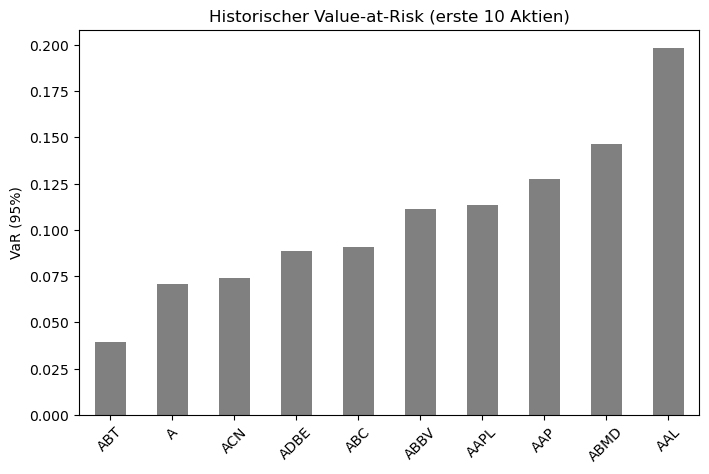

In [7]:
import matplotlib.pyplot as plt

# Nur die ersten 10 VaR-Werte auswählen
VaR_hist_10 = VaR_hist.iloc[:10]  # oder VaR_hist.loc[first_10.columns]

plt.figure(figsize=(8,5))
VaR_hist_10.sort_values().plot(kind='bar', color='grey')
plt.ylabel('VaR (95%)')
plt.title('Historischer Value-at-Risk (erste 10 Aktien)')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

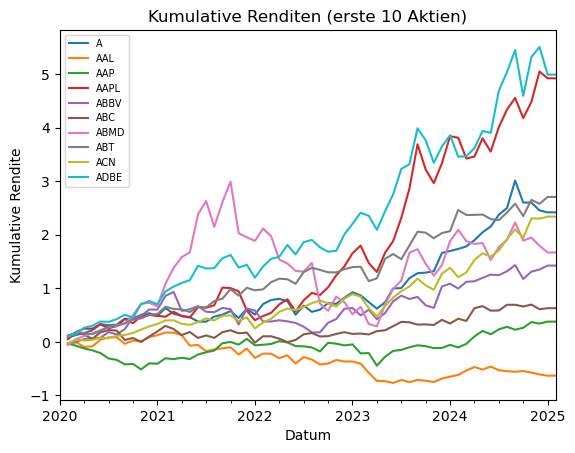

In [8]:
import numpy as np
import pandas as pd

# Nur die ersten 10 Aktien
first_10 = diskrete_renditen.iloc[:, :10]

# Kumulative Renditen für die ersten 10 Aktien
cum_returns_10 = (1 + first_10).cumprod() - 1

# Optional: Portfolio-Rendite (equal weights der 10 Aktien)
weights_10 = np.ones(10) / 10
cum_portfolio_returns_10 = (1 + (first_10 @ weights_10)).cumprod() - 1

import numpy as np

weights_10 = np.ones(10) / 10  # equal weights
portfolio_returns_10 = first_10 @ weights_10
cum_portfolio_returns_10 = (1 + portfolio_returns_10).cumprod() - 1

plt.figure(figsize=(10,6))
cum_returns_10.plot()
plt.title('Kumulative Renditen (erste 10 Aktien)')
plt.xlabel('Datum')
plt.ylabel('Kumulative Rendite')
plt.legend(fontsize=7)
plt.show()

#### 4. Datenanalyse

##### 4.1 Monte-Carlo Ansatz zur Berechnung des optimalen Portfolios

In [9]:
## Annualisierte Mittelwerte & Kovarianz
mean_returns = diskrete_renditen.mean() * 12          # Monatsrenditen → annualisiert
cov_matrix = diskrete_renditen.cov() * 12            # Monats-Renditen → annualisierte Varianz

In [10]:
# Angenommen, df ist ein DataFrame mit Aktienkursen, Spalten = Aktien
prices = df.iloc[-1].values  # letzter Tag = aktuelle Kurse
num_portfolios = 5000
num_stocks = diskrete_renditen.shape[1]
num_selected = 15
max_budget = 20000

results = np.zeros((4, num_portfolios))  # 4. Zeile = Portfolio-Kosten
weights_array = np.zeros((num_portfolios, num_stocks))

np.random.seed(42)

for i in range(num_portfolios):
    selected = np.random.choice(num_stocks, size=num_selected, replace=False)
    
    # zufällige Gewichte
    weights = np.zeros(num_stocks)
    random_weights = np.random.random(num_selected)
    random_weights /= np.sum(random_weights)
    
    # zufällige Aktienpreise berücksichtigen
    total_cost = np.sum(random_weights * prices[selected])
    if total_cost > max_budget:
        random_weights *= max_budget / total_cost  # skaliere runter, um Budget einzuhalten
    
    weights[selected] = random_weights
    weights_array[i,:] = weights
    
    # Portfolio-Rendite & Volatilität
    port_return = np.dot(weights, mean_returns)
    port_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe = port_return / port_std
    
    # Ergebnis wird gespeichert
    results[0,i] = port_return
    results[1,i] = port_std
    results[2,i] = sharpe
    results[3,i] = np.sum(weights * prices)  # Portfolio-Kosten


In [11]:
## wird in Data-Frame umgewandelt
results_df = pd.DataFrame(results.T, columns=["Return", "Volatility", "Sharpe", "Cost"])

In [23]:
max_return_idx = results_df["Return"].idxmax()
max_return_portfolio = results_df.iloc[max_return_idx]

In [12]:
max_sharpe_idx = results_df["Sharpe"].idxmax()
max_sharpe_portfolio = results_df.iloc[max_sharpe_idx]

In [13]:
min_vol_idx = results_df["Volatility"].idxmin()
min_vol_portfolio = results_df.iloc[min_vol_idx]

In [14]:
min_cost_idx = results_df["Cost"].idxmin()
min_cost_portfolio = results_df.iloc[min_cost_idx]

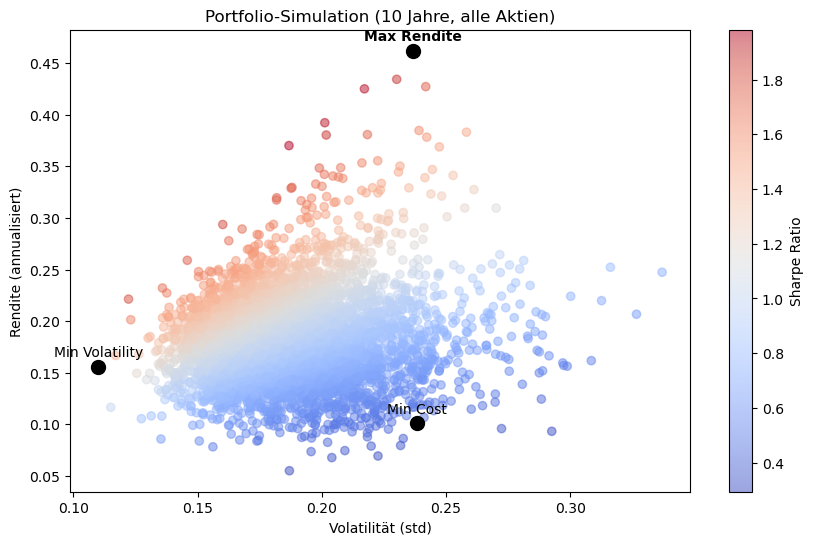

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Streudiagramm: alle Portfolios, Farbe nach Sharpe
plt.scatter(
    results_df["Volatility"], 
    results_df["Return"], 
    c=results_df["Sharpe"], 
    cmap='coolwarm',  # professioneller Farbübergang
    alpha=0.5
)
cbar = plt.colorbar()
cbar.set_label("Sharpe Ratio")

# Maximaler Sharpe-Punkt: nur Label, kein Stern
plt.scatter(
    max_return_portfolio["Volatility"], 
    max_return_portfolio["Return"], 
    color='black', 
    s=100
)
plt.text(
    max_return_portfolio["Volatility"], 
    max_return_portfolio["Return"] + 0.01,  # leicht über dem Punkt
    "Max Rendite", 
    fontsize=10, 
    fontweight='bold', 
    color='black',
    ha='center'
)

# Minimaler Volatilitäts-Punkt
plt.scatter(
    min_vol_portfolio["Volatility"], 
    min_vol_portfolio["Return"], 
    color='black', 
    s=100
)
plt.text(
    min_vol_portfolio["Volatility"], 
    min_vol_portfolio["Return"] + 0.01,
    "Min Volatility",
    fontsize=10,
    color='black',
    ha='center'
)

# Minimalste Kosten
plt.scatter(
    min_cost_portfolio["Volatility"], 
    min_cost_portfolio["Return"], 
    color='black', 
    s=100
)
plt.text(
    min_cost_portfolio["Volatility"], 
    min_cost_portfolio["Return"] + 0.01,
    "Min Cost",
    fontsize=10,
    color='black',
    ha='center'
)

plt.xlabel('Volatilität (std)')
plt.ylabel('Rendite (annualisiert)')
plt.title('Portfolio-Simulation (10 Jahre, alle Aktien)')
plt.show()

In der oben stehenden Grafik kann beobachtet werden, welche Aktienportfolios nach der Monte-Carlo Simulation mit einem Höchstpreis von 20000, die höchste Standardabweichung, die geringsten Kosten und die maximalste Rendite im Jahresdurchschnitt haben. Das Verhältnis aus Rendite und Volatilität ist durch eine Sharpeness Ratio in aufsteigender Farbe von blau zu rot dargestellt. Interessanterweise hat das kostengünstigste Portfolio aus 15 Aktien eine hohe Volatilität und eine sehr geringe Rendite, weshalb es sich nicht für Anleger eignet.

In [20]:
# Index des besten Sharpe-Portfolios
max_sharpe_idx = np.argmax(results[2])

best_return = results[0, max_sharpe_idx]
best_vol = results[1, max_sharpe_idx]
best_sharpe = results[2, max_sharpe_idx]
best_cost = results[3, max_sharpe_idx]

best_weights = weights_array[max_sharpe_idx]

print("Bestes Portfolio (Max Sharpe):")
print("Rendite:", best_return)
print("Volatilität:", best_vol)
print("Sharpe:", best_sharpe)
print("Kosten:", best_cost)

Bestes Portfolio (Max Sharpe):
Rendite: 0.3701392348476337
Volatilität: 0.18675569387703878
Sharpe: 1.9819435068541253
Kosten: 191.65977277250738


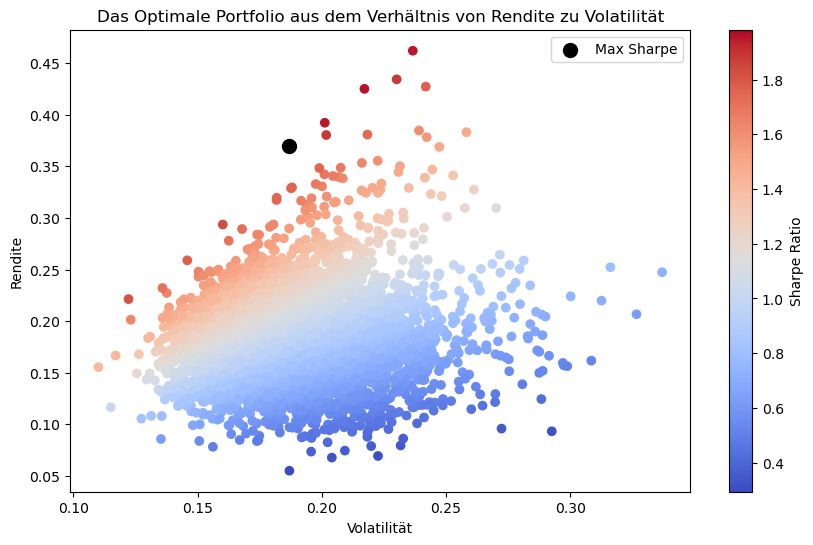

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(results[1], results[0], c=results[2], cmap="coolwarm")
plt.colorbar(label="Sharpe Ratio")

# Max Sharpe markieren
plt.scatter(best_vol, best_return, color="black", s=100, label="Max Sharpe")

plt.xlabel("Volatilität")
plt.ylabel("Rendite")
plt.title("Das Optimale Portfolio aus dem Verhältnis von Rendite zu Volatilität")
plt.legend()
plt.show()


In [38]:
import pandas as pd

# Portfolio-DataFrame erstellen
portfolio = pd.DataFrame({
    "Aktie": renditen.columns,
    "Gewichtung": best_weights
})

# Nach Gewichtung > 0,000001 filtern
portfolio = portfolio[portfolio["Gewichtung"] > 0.000001]

# Nach Gewichtung absteigend sortieren
portfolio = portfolio.sort_values(by="Gewichtung", ascending=False)

# Ausgabe
print(portfolio)

# Summe der sichtbaren Gewichte
print("Summe der angezeigten Gewichte:", portfolio["Gewichtung"].sum())

    Aktie  Gewichtung
457   WEC    0.105073
344    PG    0.104288
29    AMD    0.103392
222  IDXX    0.101092
223   IEX    0.093663
154  ENPH    0.092698
228  INTC    0.075962
278   MAS    0.075131
471  XLNX    0.052440
414   TGT    0.047974
210   HLT    0.043933
370   REG    0.035210
375    RL    0.027506
307  NDAQ    0.020937
475   YUM    0.020701
Summe der angezeigten Gewichte: 1.0


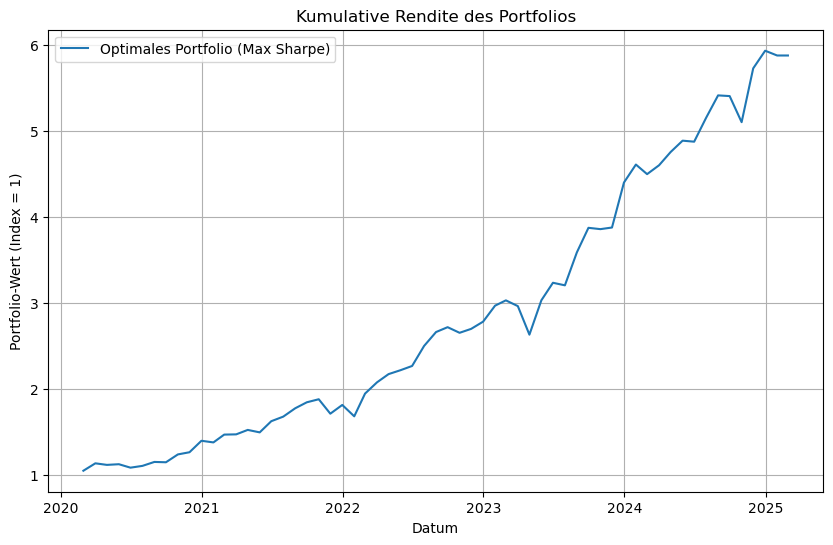

In [40]:
portfolio_returns = renditen.dot(best_weights) # Portfolio-Rendite berechnen
cumulative_returns = (1 + portfolio_returns).cumprod() # Kumulative Rendite

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(cumulative_returns, label="Optimales Portfolio (Max Sharpe)")
plt.title("Kumulative Rendite des Portfolios")
plt.xlabel("Datum")
plt.ylabel("Portfolio-Wert (Index = 1)")
plt.legend()
plt.grid(True)
plt.show()

### 5. Modellevaluation

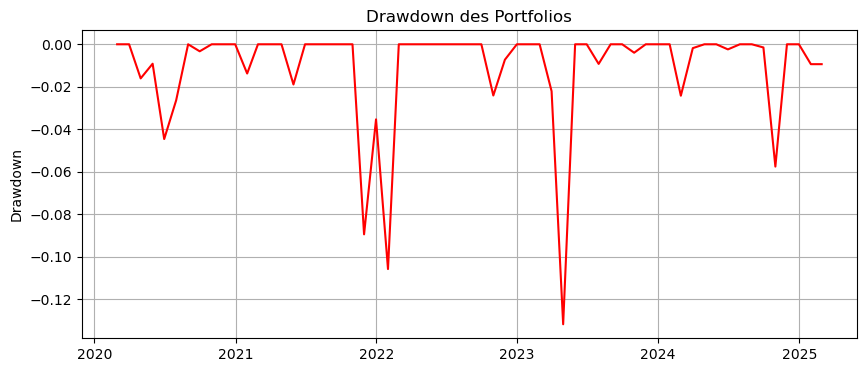

Max Drawdown: -13.18%


In [45]:
cumulative = (1 + portfolio_returns).cumprod()
running_max = cumulative.cummax()
drawdown = (cumulative - running_max) / running_max

plt.figure(figsize=(10,4))
plt.plot(drawdown, color='red')
plt.title("Drawdown des Portfolios")
plt.ylabel("Drawdown")
plt.grid(True)
plt.show()

max_drawdown = drawdown.min()  # größter Verlust
print(f"Max Drawdown: {max_drawdown:.2%}")

In [50]:
# Annualisierung für monatliche Daten
annualized_return = (1 + portfolio_returns.mean())**12 - 1
annualized_vol = portfolio_returns.std() * (12**0.5)
sharpe_ratio = annualized_return / annualized_vol

print(f"Annualisierte Rendite: {annualized_return:.2%}")
print(f"Annualisierte Volatilität: {annualized_vol:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

var_95 = portfolio_returns.quantile(0.05)
print(f"5%-monatlicher Value-at-Risk: {var_95:.2%}")

Annualisierte Rendite: 43.99%
Annualisierte Volatilität: 18.68%
Sharpe Ratio: 2.36
5%-monatlicher Value-at-Risk: -5.62%


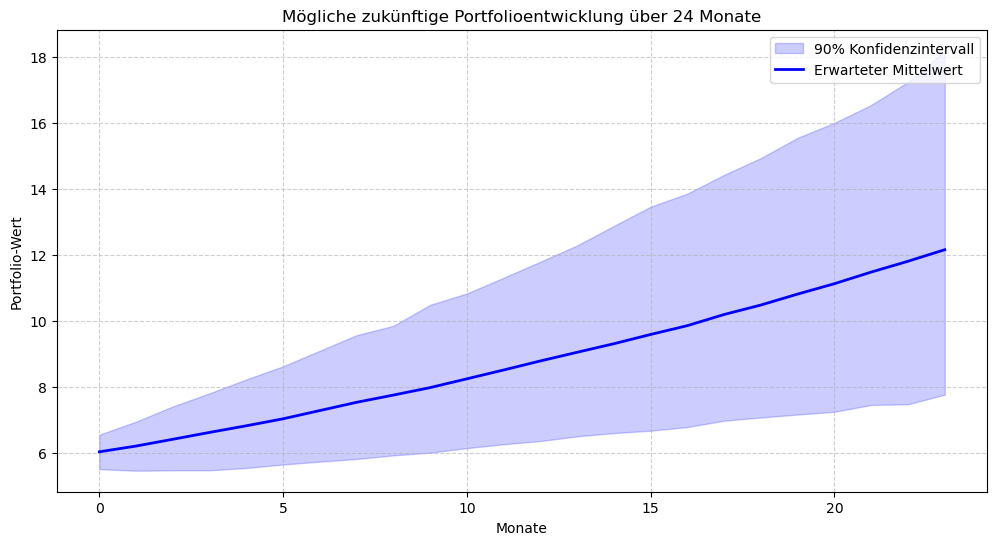

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Historische monatliche Rendite und Volatilität
mu = portfolio_returns.mean()
sigma = portfolio_returns.std()

# Zukünftige mögliche Entwicklung simulieren
start_value = cumulative_returns.iloc[-1]  # Start bei letztem historischen Wert
months = 24      # z.B. 5 Jahre in Monaten
simulations = 1000  # Anzahl der simulierten Szenarien

simulated_paths = np.zeros((months, simulations))
for i in range(simulations):
    simulated_returns = np.random.normal(loc=mu, scale=sigma, size=months)
    simulated_paths[:, i] = start_value * np.cumprod(1 + simulated_returns)

simulated_df = pd.DataFrame(simulated_paths)

# Konfidenzintervalle berechnen
lower = simulated_df.quantile(0.05, axis=1)
upper = simulated_df.quantile(0.95, axis=1)
mean_path = simulated_df.mean(axis=1)

plt.figure(figsize=(12,6))
plt.fill_between(range(months), lower, upper, color='blue', alpha=0.2, label="90% Konfidenzintervall")
plt.plot(mean_path, color='blue', linewidth=2, label="Erwarteter Mittelwert")
plt.title(f"Mögliche zukünftige Portfolioentwicklung über {months} Monate")
plt.xlabel("Monate")
plt.ylabel("Portfolio-Wert")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


### 6. Interpretation

Unser optimales Portfolio aus den historischen Daten besteht aus: WEC PG AMD IDXX IEX ENPH INTC MAS XLNX TGT HLT REG RL NDAQ & YUM. Die optimale Gewichtung aus dem optimalen Portfolio ist oben zu finden und hat einen Maximalwert von 20.000 Euro. Das Portfolio hat eine jährliche durchschnittliche Rendite von 43,99 % und die maximalste Sharpeness (Verhältnis aus Rendite und Volatilität) der Monte-Carlo Simulation. Der historische Value-at-Risk beträgt 5,62%, weshalb wir davon ausgehen, dass mit 95%-Wahrscheinlichkeit der Verlust um 5,62% nicht unterschritten wird. Die stärksten Einbrüche der Rendite des Aktien-Portfolios können zum Jahreswechsel beobachtet werden, sowie durch den Ukraine Krieg und den Start der Corona Pandemie in 2020. Die obere Grafik zeigt, dass das Portfolio sich im Durchschnitt über alle Simulationen über 24 Monate verdoppeln kann. Gleichzeitig sehen wir auch, dass mit längerer Dauer die Unsicherheit der Vorhersage zunimmt.